In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
from cycler import cycler

# -- Figure size --
rcParams['figure.figsize'] = (12, 4)
# -- Saving Options --
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 500
rcParams['savefig.transparent'] = True
# -- Plot Styles --
rcParams['lines.linewidth'] = 0.3
teal = (106 / 256, 197 / 256, 179 / 256)
navy = (56 / 256, 74 / 256, 143 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=[teal, navy, pink])

In [4]:
from tqdm.notebook import tqdm

In [5]:
import nltk

In [1]:
def save_plot(title):
  plt.ylabel('')
  plt.savefig(f'{title}.pdf', dpi=300, bbox_inches='tight')

In [49]:
df = pd.read_csv('subtaskB_train.csv').drop(columns=['Id', 'conspiracy'])

In [50]:
df.head()

,comment_text,topic
0,"Siamo davanti ad una prova, e non solo di quoz...",Qanon
1,La storia dei 2 bimbi di Bergamo - vaccini: qu...,Covid
2,L'avete capito che non toglieranno il green pa...,Covid
3,Quindi la farsa dello spazio e della terra a ...,Terra Piatta
4,"In breve tempo, per accedere a Internet, sarà ...",Qanon


In [51]:
df.shape

(810, 2)

In [52]:
found=0
for e in list(df.columns):
    if df[e].isna().any():
        found+=1
        print(e, df[e].isna().sum())
if found==0:
  print('No NaN values found')


No NaN values found


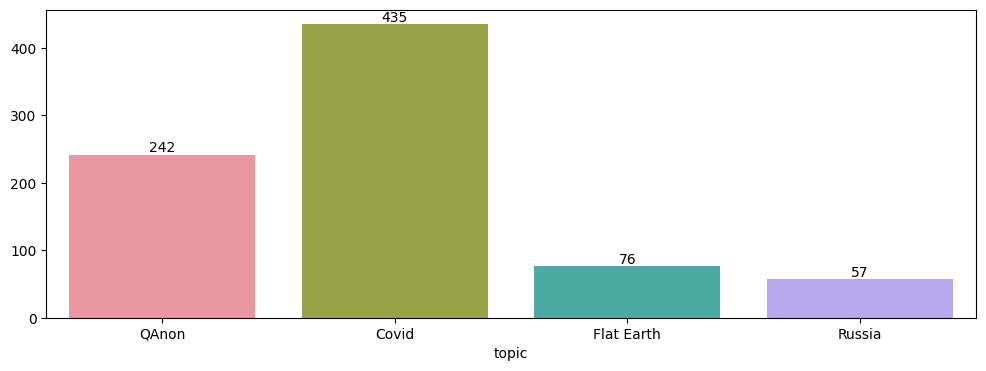

In [16]:
ax = sns.countplot(data=df, x='topic')
labels = ['QAnon', 'Covid', 'Flat Earth', 'Russia']
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xticklabels(labels)
save_plot('Topic_distribution')
plt.show()

## NLTK preprocessing

### distribuzione parole

In [25]:
import re
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
punteggiatura = ['.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$', '[', ']', '``', '_', "''", '*', '...', "’"]

In [53]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian'))

def clean_text(text, lower=False):
    """ text: a string
        return: modified initial string """
    if lower:
      text = text.lower() # lowercase text
    text = re.sub(r'[/(){}\[\]\|@,;]', ' ', text) # substitute the matched string with space.
    text = re.sub(r'[#+_]', '', text) # substitute bad symbols with nothing.
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['comment_text'] = df['comment_text'].apply(clean_text)

In [54]:
df.head(10)

,comment_text,topic
0,Siamo davanti prova solo quoziente intellettiv...,Qanon
1,La storia 2 bimbi Bergamo - vaccini: qusto gio...,Covid
2,L'avete capito toglieranno green pass anzi fin...,Covid
3,Quindi farsa spazio terra pallone continua fin...,Terra Piatta
4,In breve tempo accedere Internet richiesto doc...,Qanon
5,Quelle sembrano buone iniziative spesso finisc...,Covid
6,Se sembra pianeta influenza congenio alieno ch...,Terra Piatta
7,DA BRIAN CATES Dall'analisi dell'intelligence ...,Qanon
8,🔴🔴 VACCINI COVID: PIÙ RISCHI NEI GUARITI Gli s...,Covid
9,❗️**i leccaculo Carlo De Benedetti arrivano mi...,Qanon


In [55]:
tokens = list()

for row in df.comment_text:
    tokens_sent = nltk.word_tokenize(row)
    for token in tokens_sent:
      if not token.isnumeric() and token not in punteggiatura:
        tokens.append(token)

    #tokens += tokens_sent

print('tokens:', len(tokens),
      '\nvocabulary:', len(set(tokens)),
      '\nTTR:', len(set(tokens))/len(tokens))

tokens: 34756 
vocabulary: 12143 
TTR: 0.34937852457129703


In [56]:
tokens[:50]

['Siamo',
 'davanti',
 'prova',
 'solo',
 'quoziente',
 'intellettivo',
 'spirituale',
 'Qui',
 'l',
 'intelligenza',
 'c',
 'entra',
 'questione',
 'apertura',
 'mentale',
 'aver',
 'coraggio',
 'mettere',
 'discussione',
 'sistema',
 'crearsi',
 'propria',
 'opinione',
 'soli',
 'ognuno',
 'proprie',
 'ricerche',
 'fidandosi',
 'proprio',
 'istinto',
 'proprie',
 'sensazioni',
 'usando',
 'discernimento',
 'senza',
 'bersi',
 'priori',
 'sistema',
 'vende',
 'ogni',
 'giorno',
 'Vuol',
 'dire',
 'rimettere',
 'gioco',
 'passato',
 'istruzione',
 'credenze',
 'All',
 'inizio']

In [57]:
words, freqs = np.unique(tokens, return_counts=True)[0], np.unique(tokens, return_counts=True)[1]

sorted_freqs = sorted(zip(freqs, words), reverse=True)
sorted_frequencies, sorted_words = zip(*sorted_freqs)

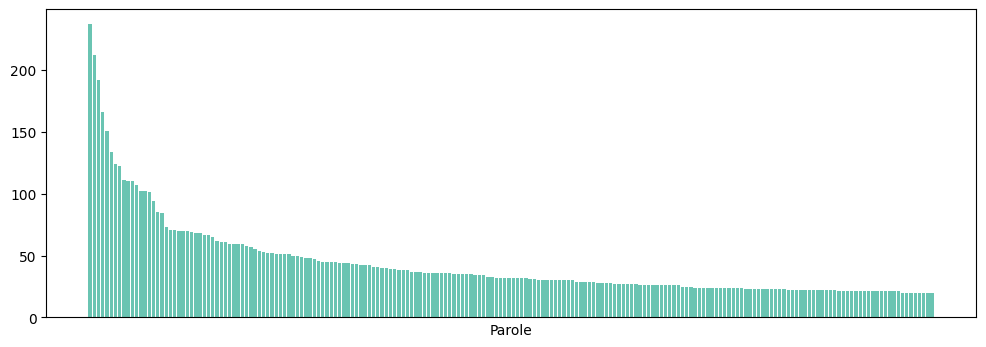

In [58]:
plt.bar(sorted_words[:200], sorted_frequencies[:200])
plt.xlabel('Parole')
plt.ylabel('Frequenza')

plt.xticks([])

#plt.savefig('zipf.pdf', dpi=300, bbox_inches='tight')
save_plot('Zipf_B')
plt.show()

### distribuzione POS

In [59]:
#punteggiatura = ('.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$')
aggettivi = ('JJ', 'JJR', 'JJS')
sostantivi = ('NN', 'NNS', 'NNP', 'NNPS')
verbi = ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'MD')
avverbi = ('RB', 'RBR', 'RBS', 'WRB')
articoli = ('DT',)
preposizioni = ('IN', 'RP')
congiunzioni = ('CC', 'IN')
pronomi = ('PRP', 'PRPS', 'WP', 'WPS')

In [60]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [61]:
tok_pos = nltk.pos_tag(tokens) #(token, POS)

pos = list() #pos only
for tok, p in tok_pos:
    if p not in punteggiatura:
        pos.append(p)


In [62]:
pos_count= list()
for p, count in zip(np.unique(pos, return_counts=True)[0], np.unique(pos, return_counts=True)[1]):
    pos_count.append((count,p))

sorted(pos_count, reverse=True)[:10]

[(18974, 'NN'),
 (8435, 'NNP'),
 (3151, 'JJ'),
 (688, 'RB'),
 (625, 'VBZ'),
 (538, 'IN'),
 (525, 'FW'),
 (483, 'VBP'),
 (277, 'VBD'),
 (259, 'NNS')]

In [63]:
def mergePOS(pos_lst, pos_counts, pos_dict, pos_key):
    for count, pos in pos_counts:
        if pos in pos_lst:
            pos_dict[pos_key]= pos_dict.get(pos_key) + count

In [64]:
pos_grouped = {
    'adjectives':0,
    'nouns':0,
    'verbs':0,
    'adverbs':0,
    'articles':0,
    'prepositions':0,
    'conjunctions':0
}

mergePOS(aggettivi, pos_count, pos_grouped, 'adjectives')
mergePOS(sostantivi, pos_count, pos_grouped, 'nouns')
mergePOS(verbi, pos_count, pos_grouped, 'verbs')
mergePOS(avverbi, pos_count, pos_grouped, 'adverbs')
mergePOS(articoli, pos_count, pos_grouped, 'articles')
mergePOS(preposizioni, pos_count, pos_grouped, 'prepositions')
mergePOS(congiunzioni, pos_count, pos_grouped, 'conjunctions')

In [65]:
pos_grouped

{'adjectives': 3157,
 'nouns': 27668,
 'verbs': 1542,
 'adverbs': 695,
 'articles': 89,
 'prepositions': 540,
 'conjunctions': 573}

In [66]:
sorted_pos = {k: v for k, v in sorted(pos_grouped.items(), key=lambda item: item[1], reverse=True)}

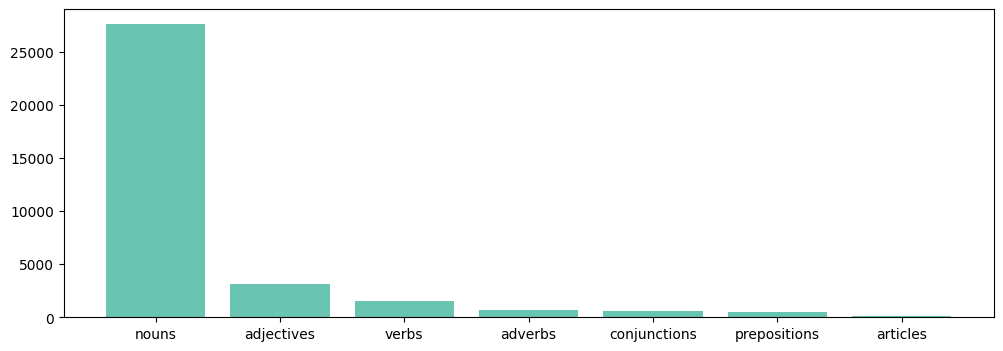

In [67]:
plt.bar(sorted_pos.keys(), sorted_pos.values())

#plt.xticks(rotation=45)
save_plot('POS_distribution_B')
plt.show()

In [68]:
pos_grouped['verbs']/pos_grouped['nouns']

0.055732253867283504

### NE

In [69]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [70]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [71]:
def extract_NE(tok_pos, NE):
  NEs = list()
  freq_NEs = list()

  # si ottiene l'albero, quindi si controlla che ci siano nodi intermedi etichettati
  # con una data NE
  ent_nom = nltk.ne_chunk(tok_pos)
  for nodo in ent_nom:
      name_ent = ''
      if hasattr(nodo, 'label'):
          if nodo.label() == NE:
              for figlio in nodo.leaves():
                  # si prende il primo elemento di ogni foglia, corrispondente al token,
                  # quindi si aggiunge la stringa ad una lista
                  name_ent += ' ' + figlio[0]
              NEs.append(name_ent)

  for ne in list(set(NEs)):
      freq = NEs.count(ne)
      freq_NEs.append((freq, ne))
  freq_NEs = sorted(freq_NEs, reverse=True)

  return freq_NEs

In [72]:
freq_persone = extract_NE(tok_pos, 'PERSON')

In [73]:
freq_persone[:15]

[(59, ' Non'),
 (27, ' Trump'),
 (22, ' Questo'),
 (19, ' Sono'),
 (17, ' Per'),
 (15, ' Putin'),
 (14, ' Questa'),
 (14, ' Ecco'),
 (14, ' Covid'),
 (13, ' Draghi'),
 (12, ' Biden'),
 (11, ' Siamo'),
 (11, ' Clinton'),
 (10, ' Tutti'),
 (10, ' Pfizer')]

In [74]:
STOPWORDS = set(stopwords.words('italian'))
' Non'.split()[0].lower() in STOPWORDS

True

In [75]:
persone_dict = dict()
threshold = 1
threshold_token = 3

for count, token in freq_persone:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    persone_dict[token] = count

In [76]:
freq_gpe = extract_NE(tok_pos, 'GPE')


In [77]:
freq_gpe[:15]

[(51, ' Russia'),
 (26, ' Italia'),
 (14, ' Ucraina'),
 (9, ' Paese'),
 (7, ' Germania'),
 (6, ' Washington'),
 (6, ' Chi'),
 (5, ' America'),
 (3, ' Roma'),
 (3, ' New York'),
 (3, ' Melania'),
 (3, ' La'),
 (3, ' Israele'),
 (3, ' Frajese'),
 (3, ' British')]

In [78]:
gpe_dict = dict()
threshold = 1
threshold_token = 2

for count, token in freq_gpe:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    gpe_dict[token] = count

## wordcloud

In [79]:
from wordcloud import WordCloud, ImageColorGenerator

In [80]:
persone_merged = list()
for token in list(persone_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = persone_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  persone_merged += (token.split())

In [81]:
import random

text = ''
random.shuffle(persone_merged)
for token in persone_merged:
  text += token + ' '
text

"Nel Suprema Il Anon Montanari Malone Pfizer Medici Public Maryland Molti Molti Ordine Draghi Eduardo Alejandro Poca Marta Letter Usciremo Vickers Jake Carlino Settimana Dentro Patel Casa Stati Quindi Wave Poi Super Hollywood Paesi Paesi Nessuna Nuland Ravenna Olivier Tutte Carrie Clinton COLPO Pregliasco Twitter Ehhhh Covid Molti Bank Putin La Ravenna Hillary Stato Giuliano Asch Jake Dopo Dicembre Trump Toscano Argentina Canada Alessandro Radio Ucraina Bianchi Qual Il State Ucraina Vernon Heilman Locatelli Italia Google Marina Messico Cardiovascular Uniti Fontain Reset Ora Covid Obbligo Roma Terzo Schloss Inoltre Trinca Verità Posso Recarey Dott Zelensky Framework Bianca Knesset Clinton Carissimi Washington Forni Bilderberg Biden Vogliamo Scoperte Quando Tutto Clinton Candidates Siaarti Nuovo Gates Visto Twitter Phillips Nessuna Crimea Ucraina Giovanni Trump Dipar Moderna Paese Regno Gates Nuovo Draghi Brutto Bologna Pfizer Maryland Inghilterra Invece Peter Etage Bianchi Rai Erich Asp

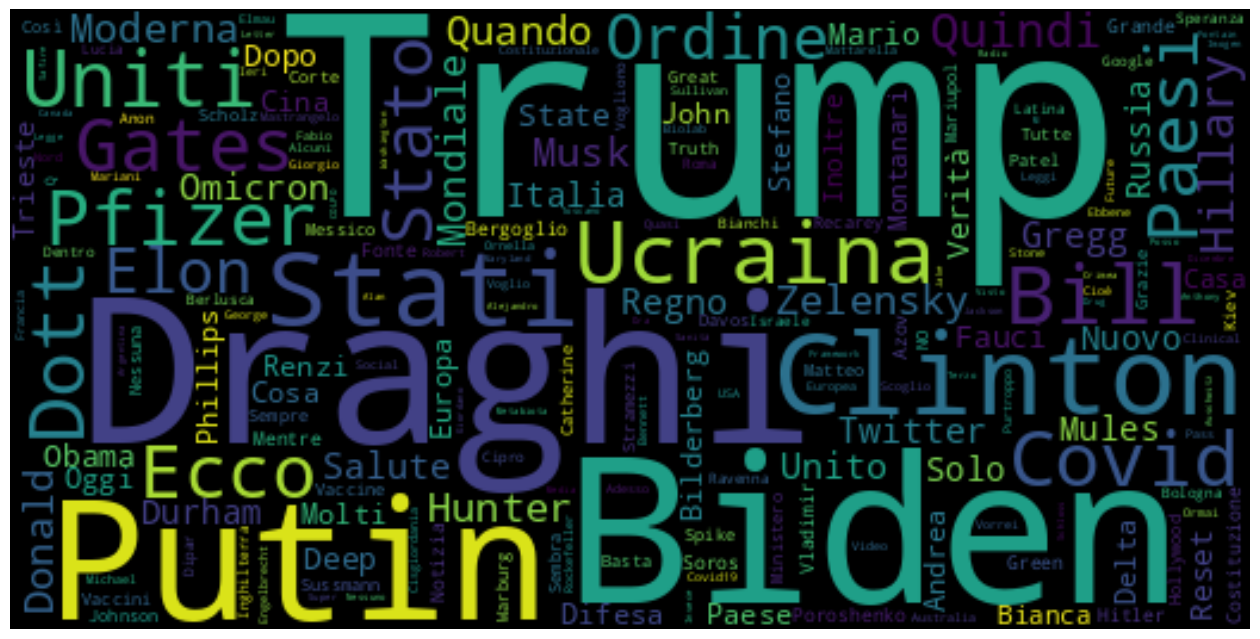

In [82]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.savefig('wordcloud_person_B.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [83]:
gpe_merged = list()
for token in list(gpe_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = gpe_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  gpe_merged += (token.split())

In [84]:
text = ''
random.shuffle(gpe_merged)
for token in gpe_merged:
  text += token + ' '
text

'Graaff Russia Italia Russia Russia Paese Jordan Germania Ucraina Euromomo Paese Italia Green Russia Toscano Russia Inghilterra Italia Italia Paese Russia Ucraina Chiaro Russia Russia Invia Russia Australia Danimarca Russia Italia Russia Russa Russia Quando Russia Russi Costarica Germania Russia Italia Cercano SORDINA Italia Chinnici Ucraina Pennsylvania Ucraina Catania Russia Russia Palmer Russia New Chiamate Russia Aspenia Italiano Maidan Argentina Italia Russia Crollano Israele Georgia America Italia Melania European Ucraina Russia Newsmax Russia New Germania Washington Russia Visualizzazione Green Australia Slovenia York Israele British Australia Austria America Russia Russia Russia Italia Pian Italiano Pensano Ucraina Italia Polonia Porca Eurogendfor Sperando Russia Élite Canale Russia Lancet Roma Wales York Cisgiordania Melania British Washington Russia Russia Roma Paese Sparta New Russia Russia New Latina Europa Coronavirus Italia Italia Washington America Australiana Riprendend

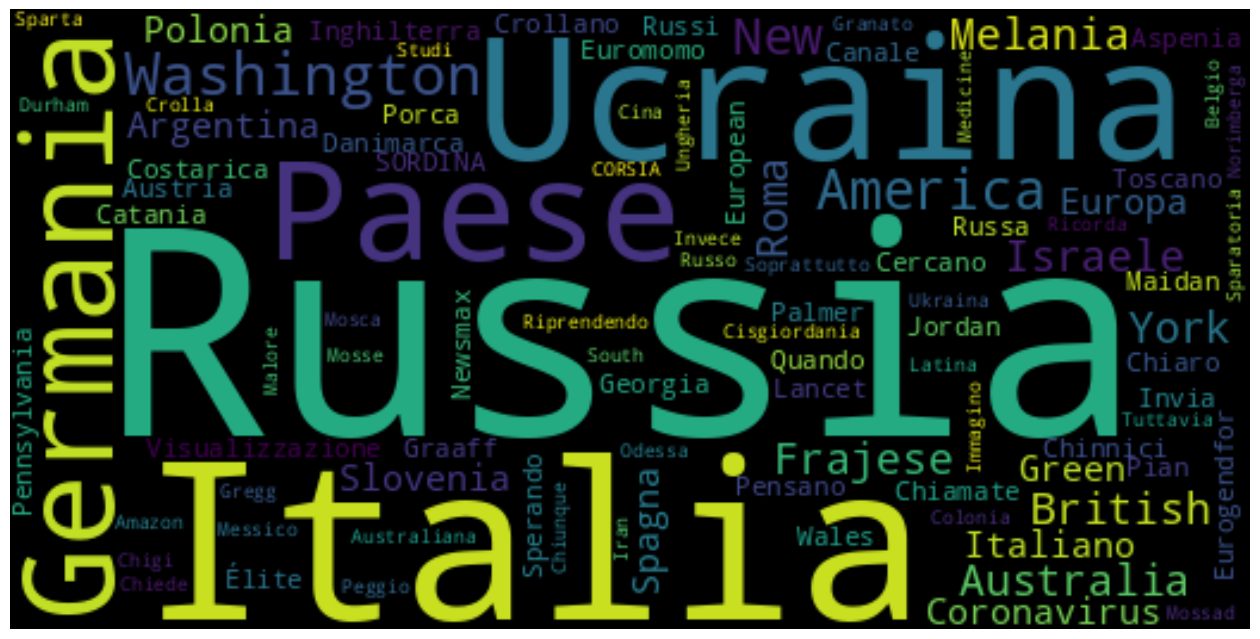

In [85]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.savefig('wordcloud_gpe_B.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Sentiment analysis

In [ ]:
!pip uninstall vaderSentiment
!pip install vader-multi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 2.9 MB/s eta 0:00:00


VADER è un lexicon pensato solo per l'inglese

vader-multi effettua una traduzione della frase in inglese tramite Google Translate API e puoi effettua la SA tramite la libreria "Vader" in inglese.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("VADER is smart, handsome, and funny.")

{'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}

In [ ]:
analyzer.polarity_scores("VADER è MOLTO INTELLIGENTE, bello e DIVERTENTE!!!")

{'neg': 0.0, 'neu': 0.224, 'pos': 0.776, 'compound': 0.9417}

In [ ]:
print(df['comment_text'][3])
analyzer.polarity_scores(df['comment_text'][3])

Quindi farsa spazio terra pallone continua finti viaggi lunari marziani.. motivo vengono finanziati migliardi d idollari.. poco costo.. dato lanciano razzo poi e' destinato cadere nell'oceano.. atterrare solo base.. gente poi casca dato dopo aver visto lancio reale poi assiste film fatto studio stesso sfornano film Marvel.. reata' virtuale possono fare cio' vogliono!!


{'neg': 0.096, 'neu': 0.846, 'pos': 0.059, 'compound': -0.554}

In [ ]:
df_vader = pd.DataFrame(columns=['text', 'neg', 'neu', 'pos','compound', 'topic'])

In [ ]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    df_vader.loc[i, 'text'] = row['comment_text']
    df_vader.loc[i, 'conspiratorial'] = row['topic']
    try:
      score = analyzer.polarity_scores(row['comment_text'])
      for key in score.keys():
          df_vader.loc[i, key] = score[key]
    except IndexError:
      continue
    df_vader.loc[i, 'conspiratorial'] = row['topic']

df_vader.head()

  0%|          | 0/810 [00:00<?, ?it/s]

,text,neg,neu,pos,compound,topic,conspiratorial
0,Siamo davanti prova solo quoziente intellettiv...,0.058,0.715,0.227,0.959,NaN,Qanon
1,La storia 2 bimbi Bergamo - vaccini: qusto gio...,0.107,0.893,0.0,-0.2023,NaN,Covid
2,L'avete capito toglieranno green pass anzi fin...,0.06,0.94,0.0,-0.1027,NaN,Covid
3,Quindi farsa spazio terra pallone continua fin...,0.096,0.846,0.059,-0.554,NaN,Terra Piatta
4,In breve tempo accedere Internet richiesto doc...,0.0,1.0,0.0,0.0,NaN,Qanon


In [ ]:
df_vader.shape

(810, 7)

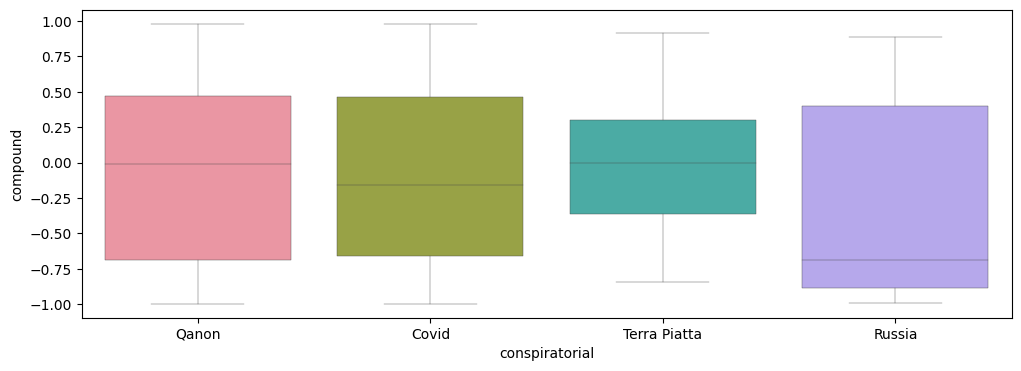

In [ ]:
sns.boxplot(data=df_vader, x='conspiratorial', y='compound')
plt.show()

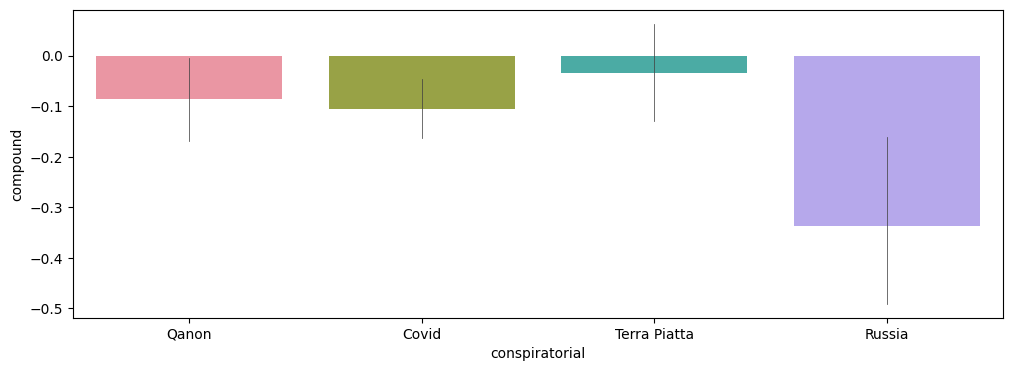

In [ ]:
sns.barplot(data=df_vader, x='conspiratorial', y='compound')
plt.show()

i post cospirazionisti tendono ad avere una sentiment più negativa

In [ ]:
df_vader.columns[1:4]

Index(['neg', 'neu', 'pos'], dtype='object')

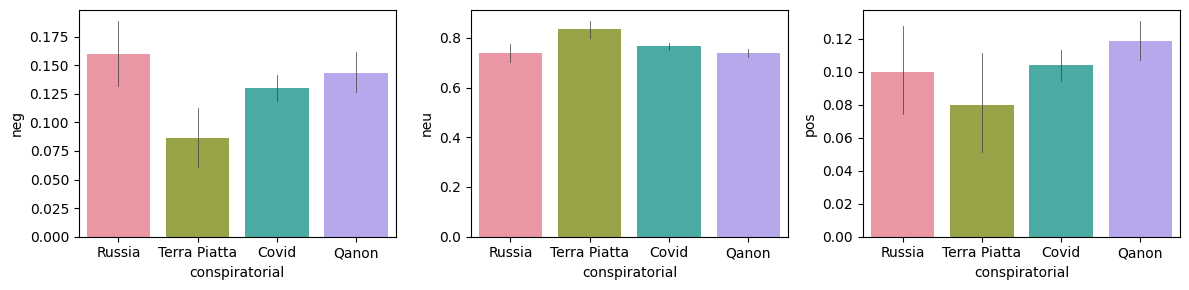

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, col in enumerate(df_vader.columns[1:4]):
    sns.barplot(data=df_vader, x='conspiratorial', y=col,
                order=list(reversed(df_vader.conspiratorial.unique())), ax=axs[i])

plt.tight_layout()

#plt.savefig('vader_barplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

notare la scala dei dati, il sentimento negativo è comunque minimo e non va mai oltre lo 0.12

In [ ]:
df_vader['compound'].mean(), df_vader['compound'].std()

(-0.10913481481481484, 0.6117505402397184)

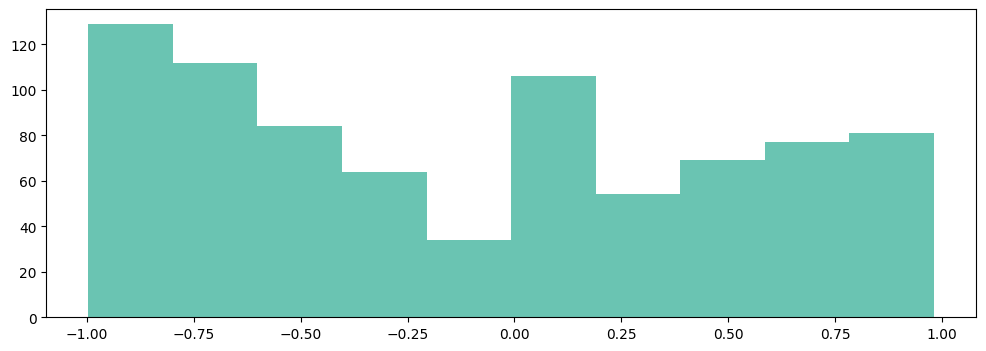

In [ ]:
plt.hist(df_vader['compound'])
plt.show()

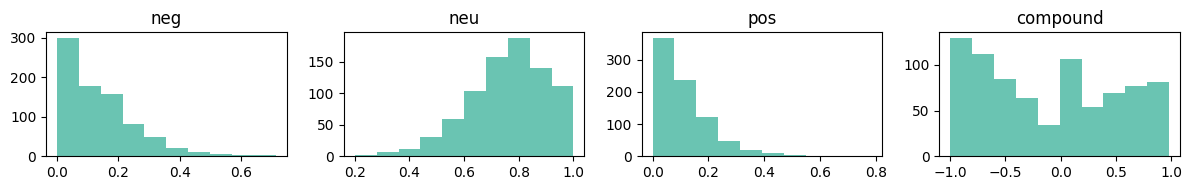

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2))

for i, col in enumerate(df_vader.columns[1:5]):
  ax=axs[i]
  ax.hist(df_vader[col])
  ax.set_title(col)

plt.tight_layout()

#plt.savefig('vader_barplot.pdf', dpi=300, bbox_inches='tight')
plt.show()